1.To use PCA Algorithm for dimensionality reduction.
You have a dataset that includes measurements for different variables on wine
(alcohol, ash, magnesium, and so on). Apply PCA algorithm & transform this data
so that most variations in the measurements of the variables are captured by a small
number of principal components so that it is easier to distinguish between red and
white wine by inspecting these principal components.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
data=pd.read_csv('wine.csv')

In [3]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [4]:
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [8]:
y_pred_before=knn.predict(X_test)

In [9]:
knn.score(X_test,y_test)

0.7222222222222222

In [10]:
print(accuracy_score(y_test,y_pred_before))

0.7222222222222222


In [11]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [12]:
knnn=KNeighborsClassifier(n_neighbors=5)
knnn.fit(X_train,y_train)
y_pred_scaler=knnn.predict(X_test)
print(accuracy_score(y_pred_scaler,y_test))

0.9444444444444444


In [13]:
pca=PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)


In [14]:
knn_pca=KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca,y_train)
y_pred_pca=knn_pca.predict(X_test_pca)
print(accuracy_score(y_pred_pca,y_test))

1.0


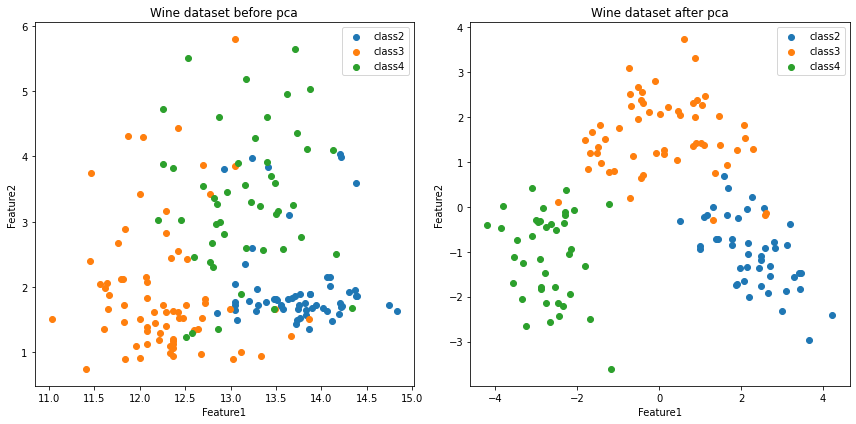

In [15]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
for i in np.unique(y):
    plt.scatter(X[y==i].iloc[:,0],X[y==i].iloc[:,1],label=f"class{i+1}")
plt.title("Wine dataset before pca")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.legend()

plt.subplot(1,2,2)
for i in np.unique(y_train):
    plt.scatter(X_train_pca[y_train==i,0],X_train_pca[y_train==i,1],label=f"class{i+1}")
plt.title("Wine dataset after pca")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.legend()
plt.tight_layout()
plt.show()

2.Predict the price of the Uber ride from a given pickup point to the 
agreed drop-off location. Perform following tasks: 
1. Pre-process the dataset. 
2. Identify outliers. 
3. Check the correlation. 
4. Implement linear regression and ridge, Lasso regression models. 
5. Evaluate the models and compare their respective scores like R2, 
RMSE, etc.

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error
import matplotlib.pyplot as plt


In [17]:
uber_data=pd.read_csv('uber.csv')

In [18]:
uber_data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [19]:
uber_data.shape

(200000, 9)

In [20]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [21]:
uber_data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [22]:
uber_data.fillna(method='ffill', inplace=True)

In [23]:
uber_data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [24]:
uber_data['pickup_datetime']=pd.to_datetime(uber_data['pickup_datetime'])

In [25]:
uber_data['pickup_hour']=uber_data['pickup_datetime'].dt.hour
uber_data['pickup_minute']=uber_data['pickup_datetime'].dt.minute

In [26]:
X=uber_data[["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","passenger_count"]]
y=uber_data['fare_amount']

In [27]:
q1=X.quantile(0.25)
q3=X.quantile(0.75)
IQR=q3-q1
outliers=((X<(q1-1.5*IQR))|(X>(q3+1.5*IQR))).any(axis=1)
X=X[~outliers]
y=y[~outliers]

In [28]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=1.0)

In [31]:
linear_reg.fit(X_train,y_train)

LinearRegression()

In [32]:
ridge_reg.fit(X_train,y_train)

Ridge()

In [33]:
lasso_reg.fit(X_train,y_train)

Lasso()

In [34]:
y_pred_linear = linear_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)

In [35]:
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)

r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)

r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)

In [36]:
print("Linear Regression R-squared:", r2_linear)
print("Linear Regression RMSE:", rmse_linear)

print("Ridge Regression R-squared:", r2_ridge)
print("Ridge Regression RMSE:", rmse_ridge)

print("Lasso Regression R-squared:", r2_lasso)
print("Lasso Regression RMSE:", rmse_lasso)

Linear Regression R-squared: 0.021268931181858797
Linear Regression RMSE: 4.854020169111231
Ridge Regression R-squared: 0.021268954939478335
Ridge Regression RMSE: 4.854020110198232
Lasso Regression R-squared: -5.206979623029184e-07
Lasso Regression RMSE: 4.906479653605686


3.Use the diabetes data set from UCI and Pima Indians Diabetes data set 
for performing the following:
a. Univariate analysis: Frequency, Mean, Median, Mode, Variance, 
Standard 
Deviation, Skewness and Kurtosis
b. Bivariate analysis: Linear and logistic regression modeling
c. Multiple Regression analysis
d. Also compare the results of the above analysis for the two data sets

In [37]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

# Load the dataset
df = pd.read_csv('Diabetes.csv')

# Univariate analysis
print(df.describe())  # This will give you mean, median (50%), and standard deviation
print(df.mode())  # This will give you mode
print(df.var())  # This will give you variance
print(df.skew())  # This will give you skewness
print(df.kurtosis())  # This will give you kurtosis
X = df[['Glucose', 'BMI']]
y = df['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
# Bivariate analysis
# Let's assume you want to predict column 'y' based on column 'x'


# Linear regression
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)
print(f"Linear model RMSE: {np.sqrt(mean_squared_error(y, y_pred_linear))}")

# Logistic regression
# For logistic regression, 'y' should be a binary variable
logistic_model = LogisticRegression()
logistic_model.fit(X, y)
y_pred_logistic = logistic_model.predict(X)
print(f"Logistic model accuracy: {accuracy_score(y, y_pred_logistic)}")

# Multiple Regression analysis
# Let's assume you want to predict column 'y' based on columns 'x1', 'x2', 'x3'
X_multi = df[['Glucose', 'BloodPressure', 'BMI', 'Insulin']]
multi_model = LinearRegression()
multi_model.fit(X_multi, y)
y_pred_multi = multi_model.predict(X_multi)
print(f"Multiple regression model RMSE: {np.sqrt(mean_squared_error(y, y_pred_multi))}")


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

4.Implementation of Support Vector Machines (SVM) for classifying 
images of hand written digits into their respective numerical classes (0 to 
9).

In [39]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [40]:
mnist=fetch_openml('mnist_784')


In [42]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [43]:
X=mnist.data

In [44]:
y=mnist.target

In [45]:
X = X/255

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
svm_classifier=SVC(kernel='rbf',C=1.0,gamma="scale")
svm_classifier.fit(X_train,y_train)
y_pred=svm_classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)

In [59]:
classification=classification_report(y_pred,y_test)
print(classification)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1342
           1       0.99      0.98      0.99      1613
           2       0.98      0.97      0.97      1392
           3       0.97      0.97      0.97      1427
           4       0.98      0.97      0.98      1306
           5       0.97      0.98      0.97      1267
           6       0.99      0.98      0.99      1409
           7       0.97      0.97      0.97      1505
           8       0.96      0.97      0.97      1339
           9       0.96      0.97      0.97      1400

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



In [54]:
def predictor(num):
    temp=svm_classifier.predict([X.iloc[num]])[0]
    plt.title("Predicted number:"+temp)
    plt.imshow(X.iloc[num].values.reshape(28,28))

400


C:\Users\Atharva\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


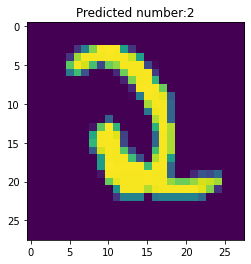

In [60]:
data=int(input())
predictor(data)

5. Implement K-Nearest Neighbours’ algorithm on Social network ad 
dataset. Compute confusion matrix, accuracy, error rate, precision and 
recall on the given dataset

In [61]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Load the dataset (replace 'your_dataset.csv' with the actual dataset file)
dataset = pd.read_csv('Social_Network_Ads.csv')

label_encoder = LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])

# Split the data into features and labels
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialize the K-NN classifier (you can adjust the number of neighbors)
classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate error rate
error_rate = 1 - accuracy

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)


Confusion Matrix:
[[56  2]
 [ 2 20]]
Accuracy: 0.95
Error Rate: 0.050000000000000044
Precision: 0.9090909090909091
Recall: 0.9090909090909091


6. Implement K-Mediod Algorithm on a credit card dataset. Determine the 
number of clusters using the Silhouette Method.

In [ ]:
!pip install scikit-learn-extra

In [72]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer

# Load the dataset
data = pd.read_csv('CC GENERAL.csv')

# Preprocess the data (e.g., handle missing values, normalize)
data = data.drop('CUST_ID', axis=1)  # Assuming 'CUST_ID' is not relevant for clustering
data.fillna(method='ffill', inplace=True)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Determine the optimal number of clusters
best_n_clusters = None
best_silhouette = -1

for n_clusters in range(2, 11):  # Test from 2 to 10 clusters
    # Perform k-medoids clustering
    initial_medoids = range(n_clusters)
    kmedoids_instance = kmedoids(data_scaled, initial_medoids)
    kmedoids_instance.process()
    
    # Calculate silhouette score
    labels = kmedoids_instance.predict(data_scaled)
    silhouette = silhouette_score(data_scaled, labels)
    
    # Update best number of clusters if this score is better
    if silhouette > best_silhouette:
        best_n_clusters = n_clusters
        best_silhouette = silhouette

print(f'Optimal number of clusters: {best_n_clusters}')

Optimal number of clusters: 3


7.Use different voting mechanism and Apply AdaBoost (Adaptive 
Boosting), Gradient Tree Boosting (GBM), XGBoost classification on Iris 
dataset and compare the performance of three models using different 
evaluation measures.

In [62]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.datasets import load_iris
data=load_iris()

In [69]:
X=data.data

In [65]:
y=data.target

In [70]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [71]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [67]:
# Initialize and train AdaBoost
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=0)
ada_clf.fit(X_train, y_train)
y_ada_pred = ada_clf.predict(X_test)
# Initialize and train Gradient Tree Boosting (GBM)
gbm_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
gbm_clf.fit(X_train, y_train)
y_gbm_pred = gbm_clf.predict(X_test)
# Initialize and train XGBoost
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
xgb_clf.fit(X_train, y_train)
y_xgb_pred = xgb_clf.predict(X_test)

In [68]:
accuracy_ada = accuracy_score(y_test, y_ada_pred)
accuracy_gbm = accuracy_score(y_test, y_gbm_pred)
accuracy_xgb = accuracy_score(y_test, y_xgb_pred)
precision_ada = precision_score(y_test, y_ada_pred, average='weighted')
precision_gbm = precision_score(y_test, y_gbm_pred, average='weighted')
precision_xgb = precision_score(y_test, y_xgb_pred, average='weighted')
recall_ada = recall_score(y_test, y_ada_pred, average='weighted')
recall_gbm = recall_score(y_test, y_gbm_pred, average='weighted')
recall_xgb = recall_score(y_test, y_xgb_pred, average='weighted')
f1_ada = f1_score(y_test, y_ada_pred, average='weighted')
f1_gbm = f1_score(y_test, y_gbm_pred, average='weighted')
f1_xgb = f1_score(y_test, y_xgb_pred, average='weighted')
print("AdaBoost Accuracy:", accuracy_ada)
print("GBM Accuracy:", accuracy_gbm)
print("XGBoost Accuracy:", accuracy_xgb)
print("AdaBoost Precision:", precision_ada)
print("GBM Precision:", precision_gbm)
print("XGBoost Precision:", precision_xgb)
print("AdaBoost Recall:", recall_ada)
print("GBM Recall:", recall_gbm)
print("XGBoost Recall:", recall_xgb)
print("AdaBoost F1 Score:", f1_ada)
print("GBM F1 Score:", f1_gbm)
print("XGBoost F1 Score:", f1_xgb)


AdaBoost Accuracy: 1.0
GBM Accuracy: 1.0
XGBoost Accuracy: 1.0
AdaBoost Precision: 1.0
GBM Precision: 1.0
XGBoost Precision: 1.0
AdaBoost Recall: 1.0
GBM Recall: 1.0
XGBoost Recall: 1.0
AdaBoost F1 Score: 1.0
GBM F1 Score: 1.0
XGBoost F1 Score: 1.0


8. tic-tac

In [73]:
import numpy as np

class TicTacToeEnvironment:
    def __init__(self):
        self.state = [0] * 9
        self.is_terminal = False

    def reset(self):
        self.state = [0] * 9
        self.is_terminal = False

    def get_available_moves(self):
        return [i for i, mark in enumerate(self.state) if mark == 0]

    def make_move(self, move, player_mark):
        self.state[move] = player_mark

    def check_win(self, player_mark):
        winning_states = [
            [0, 1, 2], [3, 4, 5], [6, 7, 8],  # rows
            [0, 3, 6], [1, 4, 7], [2, 5, 8],  # columns
            [0, 4, 8], [2, 4, 6]  # diagonals
        ]
        for state_indices in winning_states:
            if all(self.state[i] == player_mark for i in state_indices):
                self.is_terminal = True
                return True
        return False

    def is_draw(self):
        return 0 not in self.state


In [74]:
class QLearningAgent:
    def __init__(self, learning_rate=0.9, discount_factor=0.9, exploration_rate=0.3):
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.q_table = np.zeros((3**9, 9))

    def get_state_index(self, state):
        state_index = 0
        for i, mark in enumerate(state):
            state_index += (3 ** i) * (mark + 1)
        return state_index

    def choose_action(self, state, available_moves):
        state_index = self.get_state_index(state)
        if np.random.random() < self.exploration_rate:
            return np.random.choice(available_moves)
        else:
            return np.argmax(self.q_table[state_index, available_moves])

    def update_q_table(self, state, action, next_state, reward):
        state_index = self.get_state_index(state)
        next_state_index = self.get_state_index(next_state) if next_state is not None else None
        max_q_value = np.max(self.q_table[next_state_index]) if next_state is not None else 0
        self.q_table[state_index, action] = (1 - self.learning_rate) * self.q_table[state_index, action] + \
                                            self.learning_rate * (reward + self.discount_factor * max_q_value)



In [75]:
def evaluate_agents(agent1, agent2, num_episodes=1000):
    environment = TicTacToeEnvironment()
    agent1_wins = 0
    agent2_wins = 0
    draws = 0

    for _ in range(num_episodes):
        environment.reset()
        current_agent = agent1
        while not environment.is_terminal:
            available_moves = environment.get_available_moves()
            current_state = environment.state.copy()
            action = current_agent.choose_action(current_state, available_moves)
            environment.make_move(action, 1 if current_agent == agent1 else -1)

            if environment.check_win(1 if current_agent == agent1 else -1):
                current_agent.update_q_table(current_state, action, None, 10)
                if current_agent == agent1:
                    agent1_wins += 1
                else:
                    agent2_wins += 1
                break
            elif environment.is_draw():
                current_agent.update_q_table(current_state, action, None, 0)
                draws += 1
                break

            next_state = environment.state.copy()
            reward = 0
            if environment.check_win(1 if current_agent == agent1 else -1):
                reward = -10
            current_agent.update_q_table(current_state, action, next_state, reward)

            current_agent = agent2 if current_agent == agent1 else agent1

    return agent1_wins, agent2_wins, draws



In [76]:
# Create agents
agent1 = QLearningAgent()
agent2 = QLearningAgent()

# Evaluate agents
agent1_wins, agent2_wins, draws = evaluate_agents(agent1, agent2)

# Print results
print(f"Agent 1 wins: {agent1_wins}")
print(f"Agent 2 wins: {agent2_wins}")
print(f"Draws: {draws}")


Agent 1 wins: 377
Agent 2 wins: 571
Draws: 52


    TicTacToeEnvironment:
        This class represents the Tic-Tac-Toe game environment. It maintains the current state of the game, checks for a win or draw, and provides methods to reset the game and make moves.
        The __init__ method initializes the game state and sets the terminal flag to False.
        The reset method resets the game state and the terminal flag.
        The get_available_moves method returns a list of indices representing the available moves in the current game state.
        The make_move method updates the game state by placing a player's mark at the specified move index.
        The check_win method checks if a player has won the game by examining the current state.
        The is_draw method checks if the game has ended in a draw.

    QLearningAgent:
        This class represents the Q-learning agent. It learns to play Tic-Tac-Toe by updating a Q-table based on the rewards received during gameplay.
        The __init__ method initializes the learning rate, discount factor, exploration rate, and the Q-table.
        The get_state_index method converts the current game state into a unique index for indexing the Q-table.
        The choose_action method selects the action (move) to be taken based on the current game state and the exploration-exploitation tradeoff using the epsilon-greedy policy.
        The update_q_table method updates the Q-table based on the current state, action, next state, and the reward received.

    evaluate_agents:
        This function performs the evaluation of two Q-learning agents by playing multiple episodes of Tic-Tac-Toe games.
        It takes the two agents and the number of episodes to play as input.
        In each episode, the environment is reset, and the agents take turns making moves until the game is over (either a win or a draw).
        The agents update their Q-tables based on the rewards received during the episode.
        The function keeps track of the wins and draws for each agent and returns the counts.

    Main code:
        The main code creates two Q-learning agents, agent1 and agent2, using the QLearningAgent class.
        The evaluate_agents function is called to evaluate the agents by playing a specified number of episodes.
        The results (number of wins and draws) for each agent are printed.

The Q-learning algorithm involves the following steps:

    The agents choose their moves based on the current game state and the exploration-exploitation policy.
    The environment updates the game state based on the chosen moves.
    The environment checks if the game has ended (win or draw).
    The agents update their Q-tables based on the rewards received.
    The agents continue playing until the specified number of episodes is completed.